In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('spam.csv',encoding='latin-1')
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
4609,ham,Just glad to be talking to you.,NaN,NaN,NaN
673,ham,Ditto. And you won't have to worry about me sa...,NaN,NaN,NaN
1102,ham,Black shirt n blue jeans... I thk i c Ì_...,NaN,NaN,NaN
3413,ham,No pic. Please re-send.,NaN,NaN,NaN
812,spam,Congratulations ur awarded either å£500 of CD ...,NaN,NaN,NaN


# 

In [3]:
#steps
# 1 . Text Preparation
# 2 . Feature Engneering
# 3 . Modelling
# 4 . Deployment

# 1 . Text Preparation

##### Text Cleanup

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [5]:
# cause of null values we have to drop last three columns
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [6]:
df.sample(5)

,v1,v2
5273,ham,Its too late:)but its k.wish you the same.
3003,spam,You've won tkts to the EURO2004 CUP FINAL or å...
1666,ham,Guess who spent all last night phasing in and ...
1652,spam,For ur chance to win a å£250 cash every wk TXT...
493,ham,What class of &lt;#&gt; reunion?


In [7]:
#remaining the columns
df.rename(columns={'v1':'target','v2':'SMS'},inplace=True)
df.sample(5)

,target,SMS
2219,spam,You have WON a guaranteed å£1000 cash or a å£2...
2985,spam,Reply to win å£100 weekly! What professional s...
4438,ham,i want to grasp your pretty booty :)
3006,ham,Ah you see. You have to be in the lingo. I wil...
5231,ham,I realise you are a busy guy and i'm trying no...


In [8]:
# As we our target column is in word convert it into in numbers
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [9]:
df['target'] = encoder.fit_transform(df['target'])

In [10]:
df.sample(5)

,target,SMS
4464,0,\CHEERS FOR CALLIN BABE.SOZI CULDNT TALKBUT I ...
1103,0,Aiyah sorry lor... I watch tv watch until i fo...
1765,0,Hi this is yijue... It's regarding the 3230 te...
1633,0,Yesterday its with me only . Now am going home.
777,0,\Hi its Kate it was lovely to see you tonight ...


In [11]:
# Checking for missing values
df.isnull().sum()

target    0
SMS       0
dtype: int64

In [12]:
# Checking for duplicate values
df.duplicated().sum()

403

In [13]:
# So we have to remove the duplicate values
df = df.drop_duplicates(keep='first')

In [14]:
df.duplicated().sum()

0

In [15]:
df.shape

(5169, 2)

# 

## Basic Preprocessing

In [16]:
# Lowercasing
df['SMS'] = df['SMS'].str.lower()
df.head()

,target,SMS
0,0,"go until jurong point, crazy.. available only ..."
1,0,ok lar... joking wif u oni...
2,1,free entry in 2 a wkly comp to win fa cup fina...
3,0,u dun say so early hor... u c already then say...
4,0,"nah i don't think he goes to usf, he lives aro..."


In [17]:
# Removing Punctautions
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [18]:
exclude = string.punctuation

In [19]:
def remove_punct(text):
    return text.translate(str.maketrans('','',exclude))

In [20]:
df['SMS'] = df['SMS'].apply(remove_punct)
df.head()

,target,SMS
0,0,go until jurong point crazy available only in ...
1,0,ok lar joking wif u oni
2,1,free entry in 2 a wkly comp to win fa cup fina...
3,0,u dun say so early hor u c already then say
4,0,nah i dont think he goes to usf he lives aroun...


In [21]:
# Stopwords Removels
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

In [22]:
def remove_stopwords(text):
    sms =[]
    
    for word in text.split():
        if word in stop_words:
            sms.append('')
        else:
            sms.append(word)
            
    x = sms[:]
    sms.clear()
    return " ".join(x)

In [23]:
df['SMS'] = df['SMS'].apply(remove_stopwords)
df.head()

,target,SMS
0,0,go jurong point crazy available bugis n gre...
1,0,ok lar joking wif u oni
2,1,free entry 2 wkly comp win fa cup final tkt...
3,0,u dun say early hor u c already say
4,0,nah dont think goes usf lives around though


In [24]:
# Stemming
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('playing')

'play'

In [25]:
def stem_words(text):
    return " ".join([ps.stem(word) for word in text.split()])

In [26]:
df['SMS'] = df['SMS'].apply(stem_words)
df.sample(5)

,target,SMS
5098,1,themobhit link get premium pink panther game n...
1666,0,guess spent last night phase fourth dimens
1154,0,u find sitter kaitlyn sick slept day yesterday
4208,0,want kfc tuesday buy 2 meal 2 gravi 2 mark 2
3981,0,fren go lor alon wif mum n si lor


# 

## EDA

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\91735\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='target', ylabel='count'>

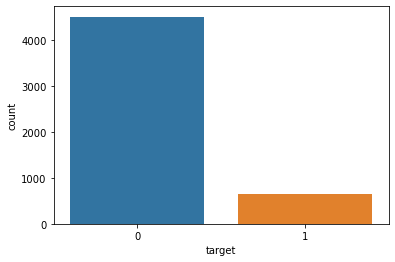

In [28]:
sns.countplot(df['target'])

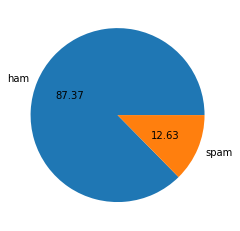

In [29]:
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [30]:
#By watching the graphs, Data is Imbalanced

In [31]:
import nltk

In [32]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\91735\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [33]:
# No of characters in the SMS
df['num_characters'] = df['SMS'].apply(len)
df.sample(5)

,target,SMS,num_characters
1223,0,rofl betta invest anti age product,34
3170,0,still otsid leu come 2morrow maga,33
2893,0,kkyesterday cbe,15
492,0,sorryin meet ill call later,27
1499,1,sm ac jsco energi high u may know 2channel 2da...,122


In [34]:
# Num of Words
df['num_words']=df['SMS'].apply(lambda x:len(nltk.word_tokenize(x)))
df.sample(5)

,target,SMS,num_characters,num_words
21,0,iû÷m go tri 2 month ha ha joke,31,8
5371,0,lol oh got friend dog,21,5
4825,0,haha thinkin,12,2
2475,0,mm way railway,14,3
689,1,forward 448712404000pleas call 08712404000 imm...,68,8


In [35]:
df[['num_characters','num_words']].describe()

,num_characters,num_words
count,5169.000000,5169.000000
mean,49.114722,9.256723
std,38.187027,6.735613
min,0.000000,0.000000
25%,21.000000,4.000000
50%,36.000000,7.000000
75%,71.000000,13.000000
max,477.000000,80.000000


In [36]:
# for Ham messages Only
df[df['target'] ==0][['num_characters','num_words']].describe()

,num_characters,num_words
count,4516.000000,4516.000000
mean,41.739814,8.200177
std,33.793246,6.304932
min,0.000000,0.000000
25%,20.000000,4.000000
50%,31.000000,6.000000
75%,55.000000,11.000000
max,477.000000,80.000000


In [37]:
# for Spam messages Only
df[df['target'] ==1][['num_characters','num_words']].describe()

,num_characters,num_words
count,653.000000,653.000000
mean,100.117917,16.563553
std,25.856136,4.809023
min,12.000000,2.000000
25%,88.000000,14.000000
50%,104.000000,17.000000
75%,118.000000,20.000000
max,155.000000,28.000000


### Difference

mean for ham meg is 70 and for spam is 137. No of words in ham are 17
but in spam are 27

<AxesSubplot:xlabel='num_characters', ylabel='Count'>

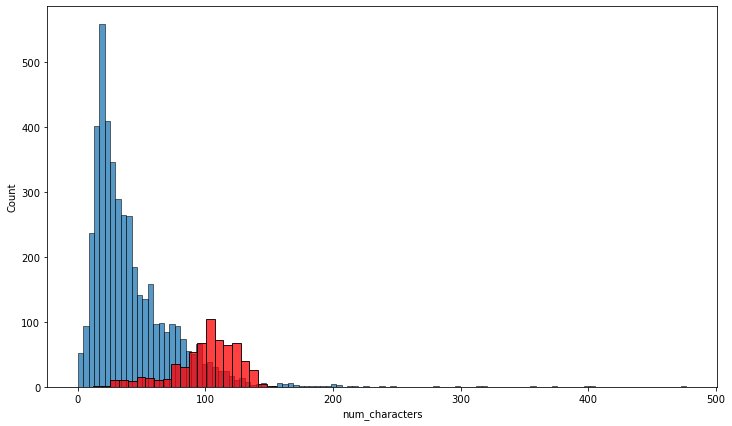

In [38]:
plt.figure(figsize=(12,7))
sns.histplot(df[df['target'] ==0]['num_characters'])
sns.histplot(df[df['target'] ==1]['num_characters'],color='red')

<AxesSubplot:xlabel='num_words', ylabel='Count'>

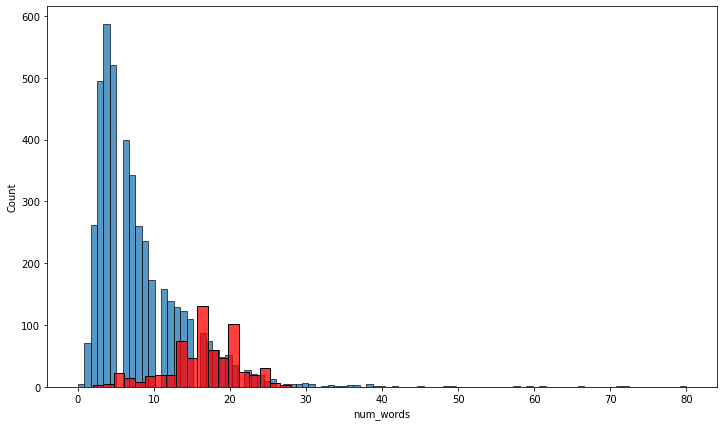

In [39]:
plt.figure(figsize=(12,7))
sns.histplot(df[df['target'] ==0]['num_words'])
sns.histplot(df[df['target'] ==1]['num_words'],color='red')

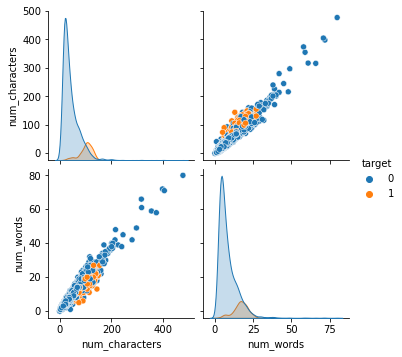

In [40]:
sns.pairplot(df,hue='target')

<AxesSubplot:>

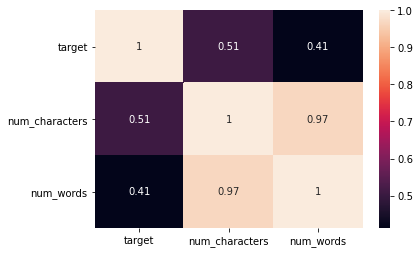

In [41]:
sns.heatmap(df.corr(),annot=True)

In [42]:
# There is strong co-relation betn independent columns

In [43]:
df.head()

,target,SMS,num_characters,num_words
0,0,go jurong point crazi avail bugi n great world...,76,16
1,0,ok lar joke wif u oni,21,6
2,1,free entri 2 wkli comp win fa cup final tkt 21...,131,23
3,0,u dun say earli hor u c alreadi say,35,9
4,0,nah dont think goe usf live around though,41,8


In [44]:
df['SMS'][0]

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

# 

# WordCloud

In [45]:
from wordcloud import WordCloud
wc = WordCloud(width=700,height=700,min_font_size=10,background_color='white')

In [46]:
spam_wc = wc.generate(df[df['target'] == 1 ]['SMS'].str.cat(sep=""))

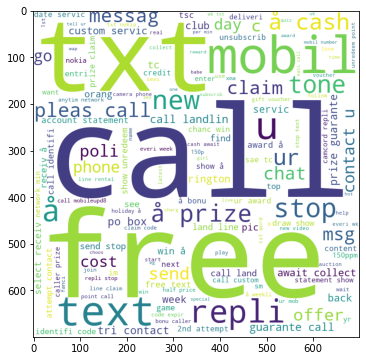

In [47]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [48]:
ham_wc = wc.generate(df[df['target'] == 0 ]['SMS'].str.cat(sep=""))

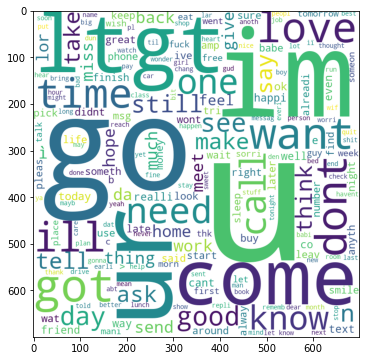

In [49]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

# 

## Most Recurring Words in Corpus

In [50]:
spam_corpus = []
for msg in df[df['target'] == 1]['SMS'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

C:\Users\91735\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


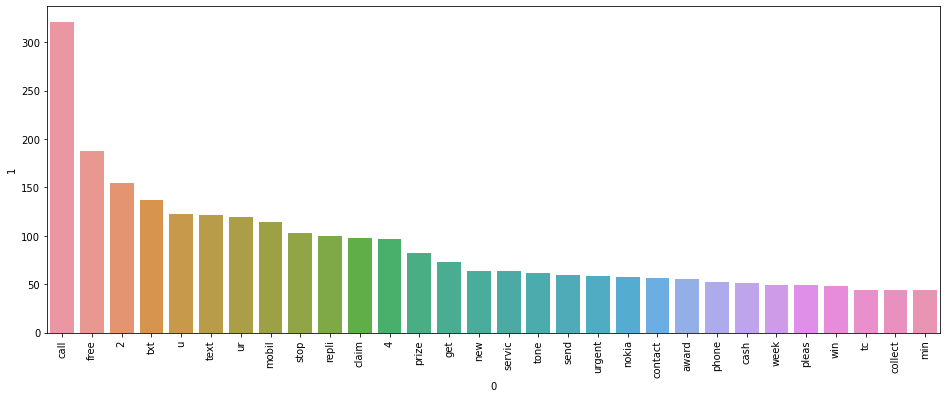

In [51]:
#Frequency Of Top 30 Words spam messages
from collections import Counter
plt.figure(figsize=(16,6))
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [52]:
ham_corpus = []
for msg in df[df['target'] == 0]['SMS'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

C:\Users\91735\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


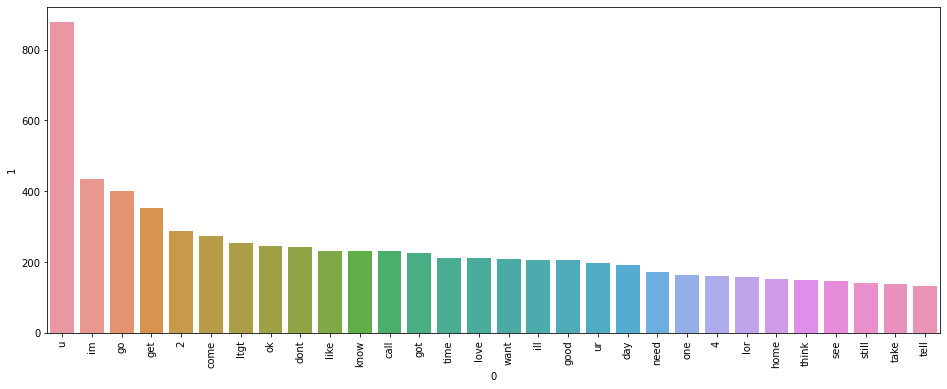

In [53]:
#Frequency Of Top 30 Words in ham messages
from collections import Counter
plt.figure(figsize=(16,6))
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

# 

# Model building & Evaluation

In [97]:
# Vectrization
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tv = TfidfVectorizer(max_features=3000)

In [98]:
X = tv.fit_transform(df['SMS']).toarray()

In [99]:
X.shape

(5169, 3000)

In [100]:
y = df['target'].values

In [101]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [102]:
from sklearn.model_selection import train_test_split

In [103]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [104]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [105]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [106]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.874274661508704
[[787 109]
 [ 21 117]]
0.5176991150442478


In [107]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9748549323017408
[[896   0]
 [ 26 112]]
1.0


In [108]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9825918762088974
[[895   1]
 [ 17 121]]
0.9918032786885246


In [109]:
# tfidf with mnb (precision score: 1.0)

In [110]:
#Applying all the Classification algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [89]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [90]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [91]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [92]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.97678916827853, 0.9672131147540983)

In [93]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.97678916827853
Precision -  0.9672131147540983
For  KN
Accuracy -  0.9042553191489362
Precision -  1.0
For  NB
Accuracy -  0.9748549323017408
Precision -  1.0
For  DT
Accuracy -  0.9381044487427466
Precision -  0.8490566037735849
For  LR
Accuracy -  0.9555125725338491
Precision -  0.9423076923076923
For  RF
Accuracy -  0.9729206963249516
Precision -  0.9824561403508771
For  AdaBoost
Accuracy -  0.960348162475822
Precision -  0.9369369369369369
For  BgC
Accuracy -  0.9613152804642167
Precision -  0.8828125
For  ETC
Accuracy -  0.9787234042553191
Precision -  0.967741935483871
For  GBDT
Accuracy -  0.9497098646034816
Precision -  0.93


C:\Users\91735\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:35:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
For  xgb
Accuracy -  0.965183752417795
Precision -  0.9396551724137931


In [94]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [95]:
temp_df

,Algorithm,Accuracy_num_chars,Precision_num_chars
1,KN,0.904255,1.000000
2,NB,0.974855,1.000000
5,RF,0.972921,0.982456
8,ETC,0.978723,0.967742
0,SVC,0.976789,0.967213
4,LR,0.955513,0.942308
10,xgb,0.965184,0.939655
6,AdaBoost,0.960348,0.936937
9,GBDT,0.949710,0.930000
7,BgC,0.961315,0.882812


# 

### Dumping Our Model With Pickle

In [111]:
import pickle
pickle.dump(tv,open('vectoriser.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))